<h1>TASK 3</h1>

<h2>Importing the necessary libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

<h2>Reading the dataset</h2>

In [2]:
data= pd.read_csv('https://github.com/AdithiVS/PRODIGYY_DS_03/raw/main/bankdataset.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 41188 non-null  int64  
 1   job                 41188 non-null  object 
 2   marital             41188 non-null  object 
 3   education           41188 non-null  object 
 4   default             41188 non-null  object 
 5   housing             41188 non-null  object 
 6   loan                41188 non-null  object 
 7   contact             41188 non-null  object 
 8   month               41188 non-null  object 
 9   day_of_week         41188 non-null  object 
 10  duration            41188 non-null  int64  
 11  campaign            41188 non-null  int64  
 12  pdays               41188 non-null  int64  
 13  previous            41188 non-null  int64  
 14  poutcome            41188 non-null  object 
 15  emp.var.rate        41188 non-null  float64
 16  cons

In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
#checking for null values
data.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
subscribed_deposit    0
dtype: int64

In [6]:
data.duplicated().sum()

12

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
#categorical data
obj_col=data.select_dtypes(include=['object']).columns
#numerical data
num_col=data.select_dtypes(include=np.number).columns

<h3>Visualising the Data</h3>

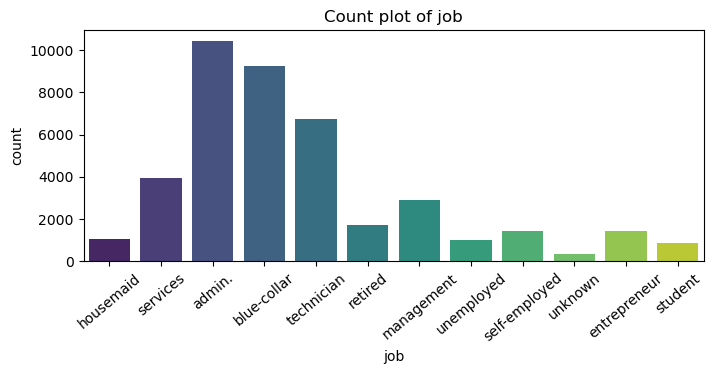

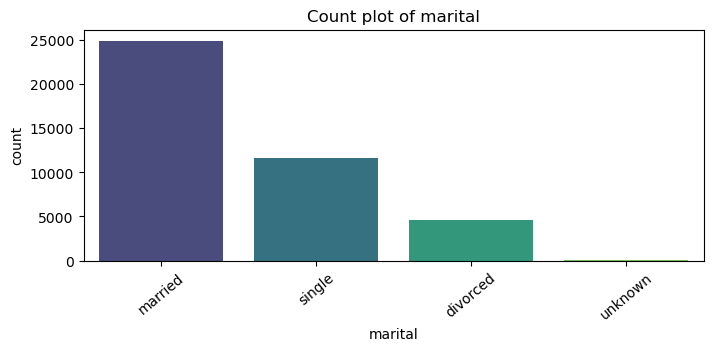

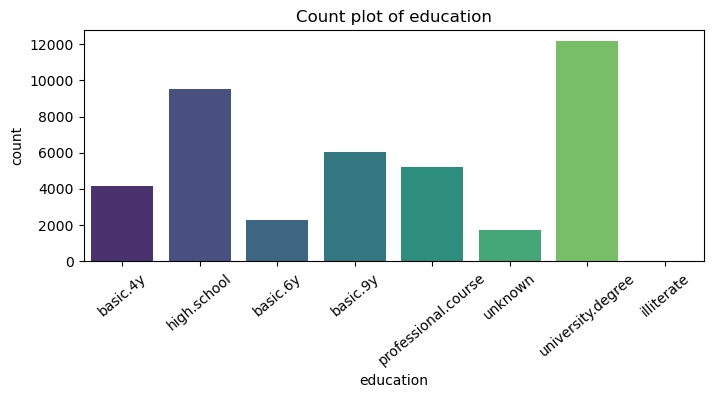

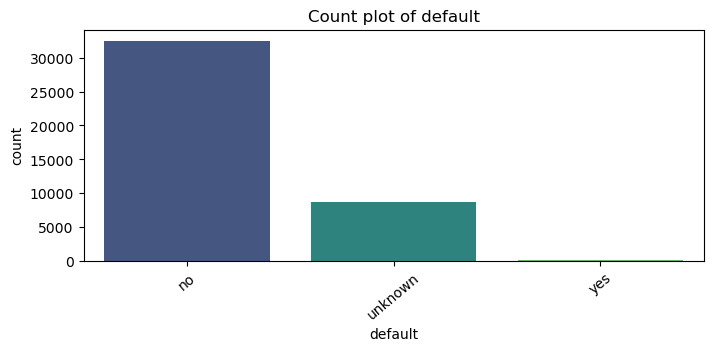

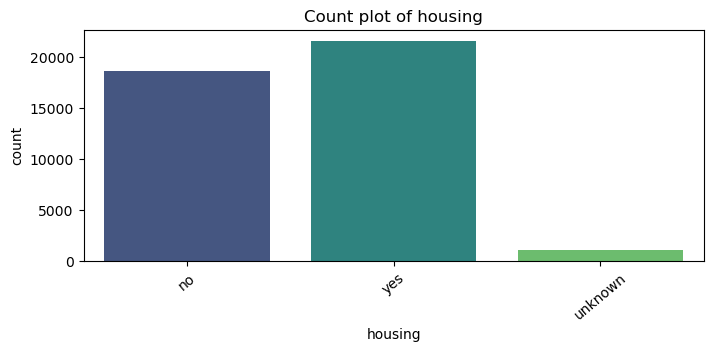

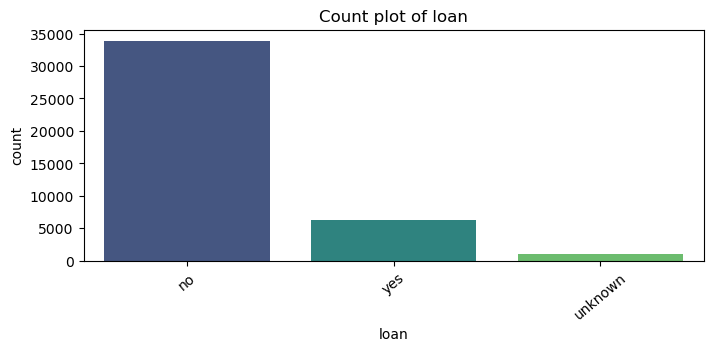

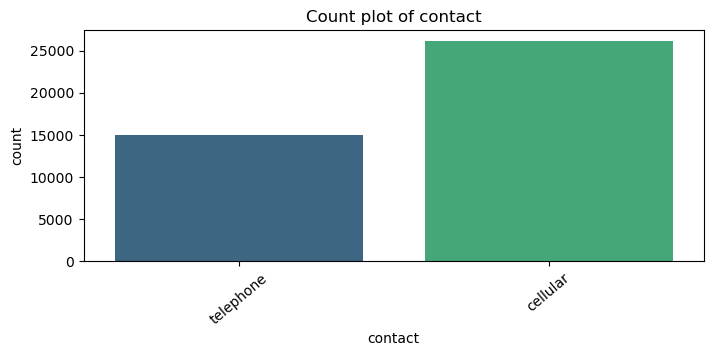

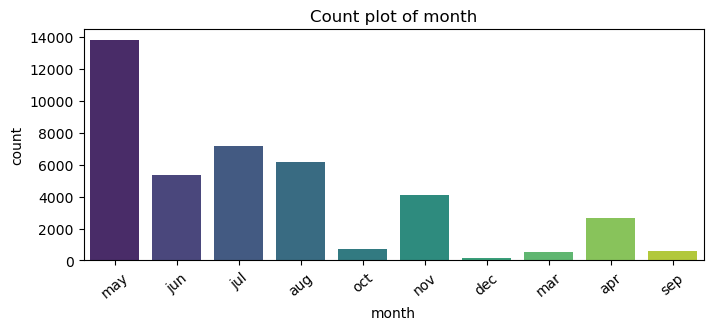

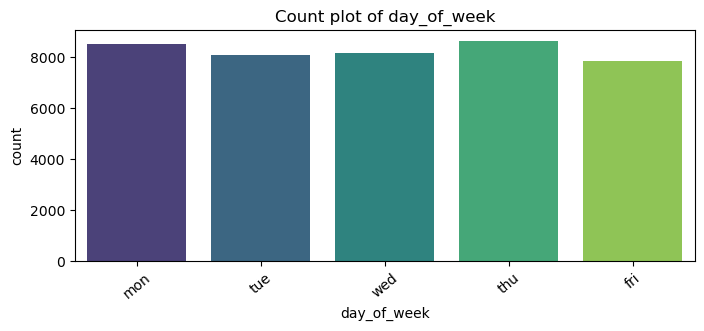

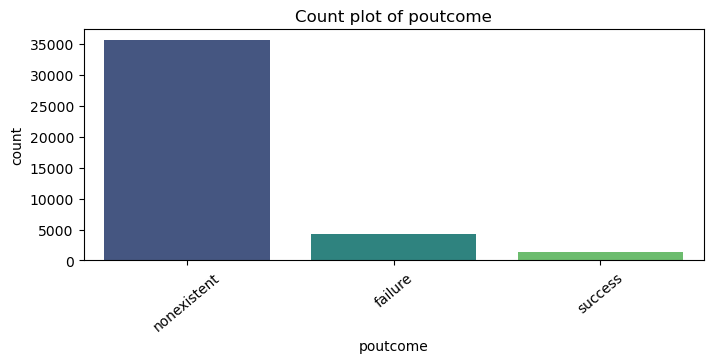

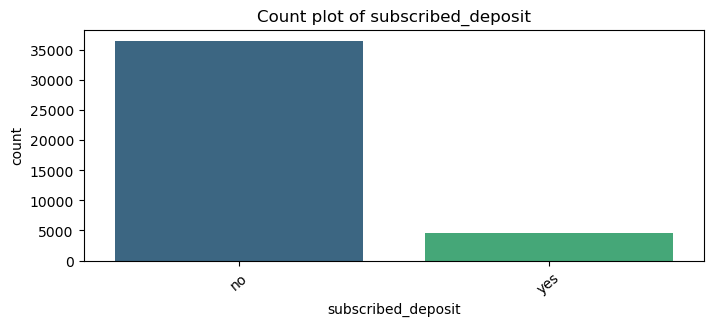

In [10]:
for feature in obj_col:
    plt.figure(figsize=(8,3))
    plt.title(f"Count plot of {feature}")
    sns.countplot(x=feature,data=data,palette='viridis')
    plt.xticks(rotation=40)
    plt.show()

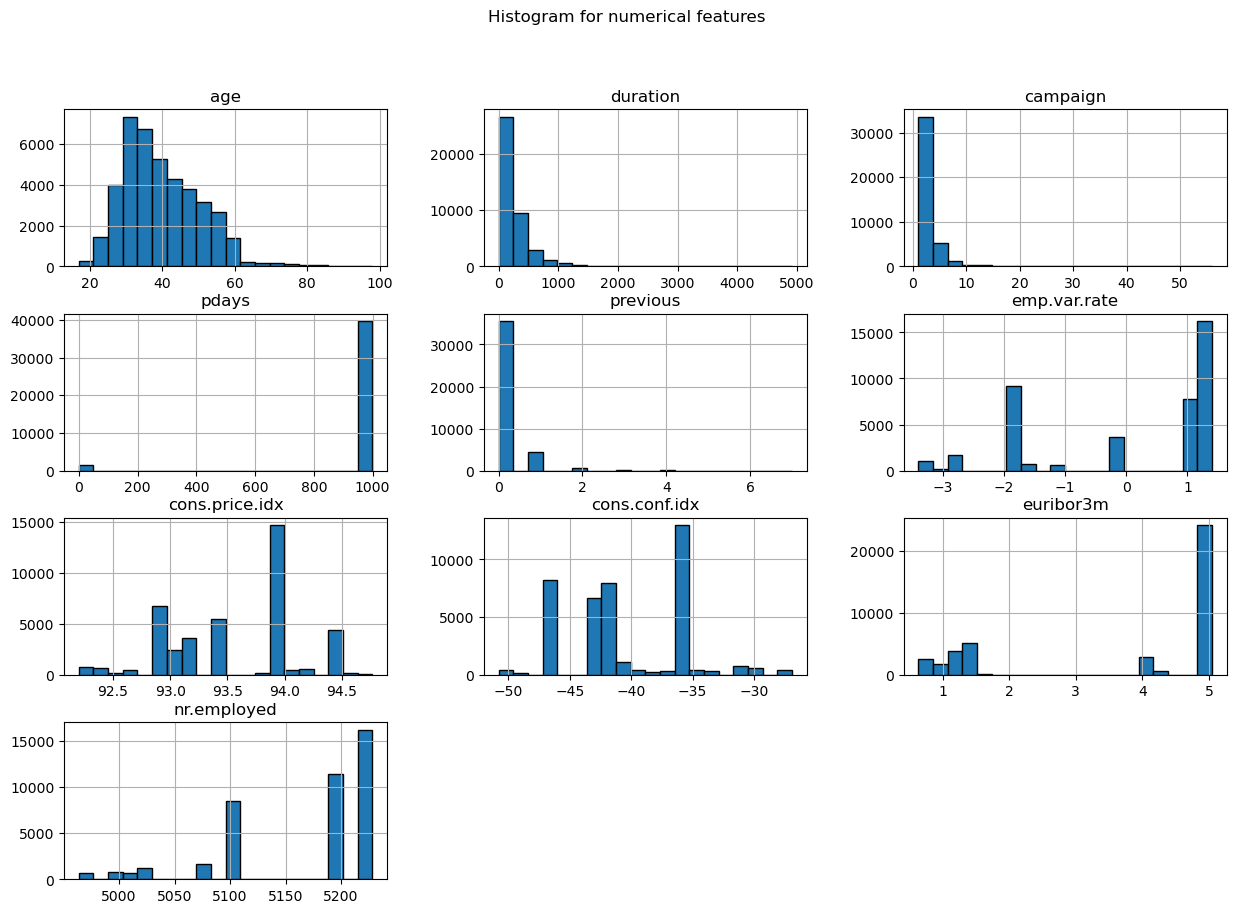

In [11]:
data[num_col].hist(figsize=(15,10),bins=20,edgecolor='k')
plt.suptitle("Histogram for numerical features")
plt.show()

<h3>Data Preprocessing</h3>

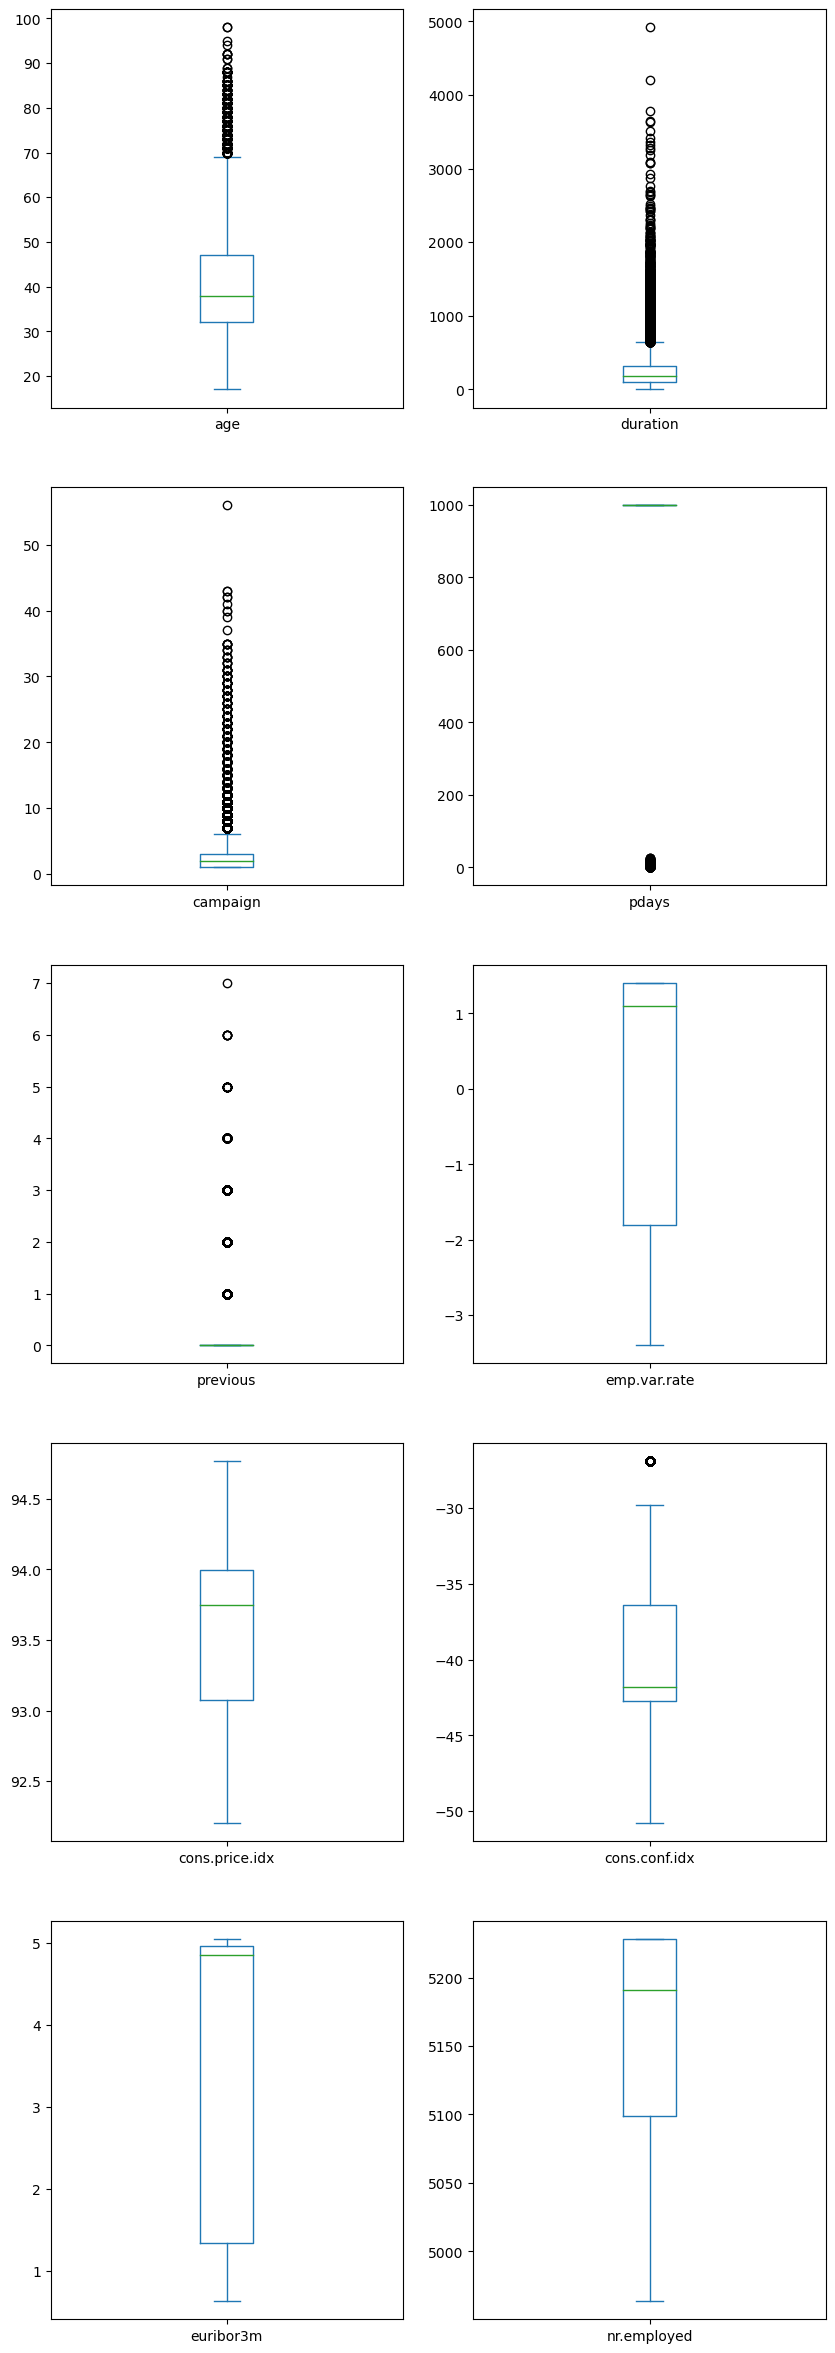

In [12]:
data.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

In [13]:
columns = ['age', 'campaign', 'duration']

for column in columns:
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Filter the DataFrame for the current column
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

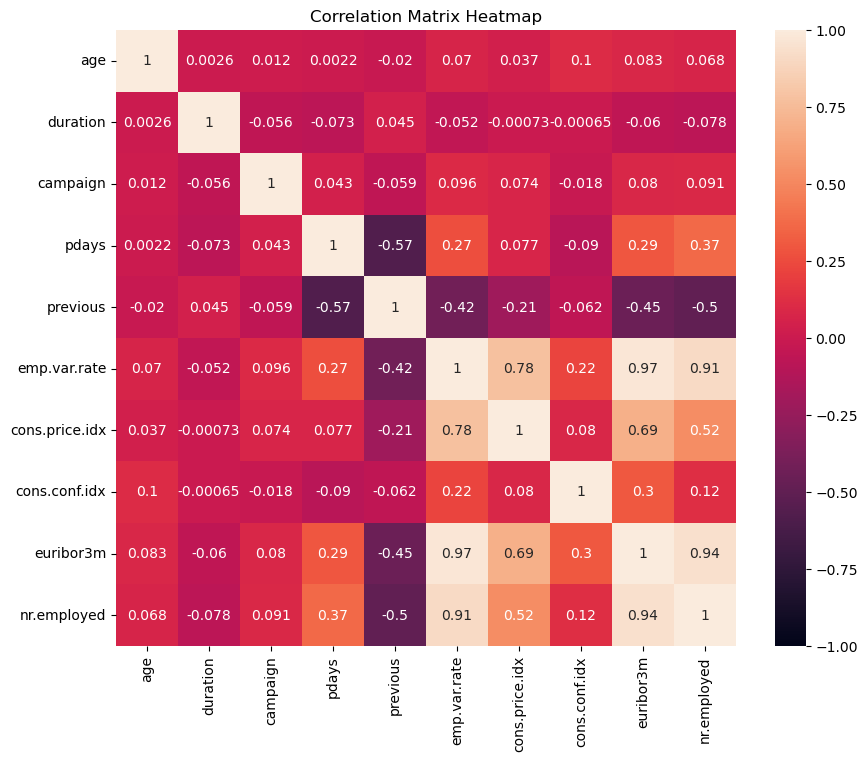

In [14]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[num_col].corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']
df1=data.copy()
# Removing high correlated columns from the dataset
df1.drop(high_corr_cols, inplace=True, axis=1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx',
       'subscribed_deposit'],
      dtype='object')

In [16]:
le=LabelEncoder()
df_encoded = df1.apply(le.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,subscribed_deposit
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,18,16,0
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,18,16,0
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,18,16,0
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,18,16,0
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,18,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,20,0,1,6,0,2,0,0,7,0,281,0,26,0,1,25,0,1
41182,12,10,2,0,0,2,0,0,7,0,112,0,9,1,2,25,0,0
41184,29,1,1,5,0,0,0,0,7,0,383,0,26,0,1,25,0,0
41185,39,5,1,6,0,2,0,0,7,0,189,1,26,0,1,25,0,0


In [17]:
df_encoded['subscribed_deposit'].value_counts(normalize=True)

0    0.918875
1    0.081125
Name: subscribed_deposit, dtype: float64

In [18]:
x=df_encoded.iloc[:,:-1]
y=df_encoded.iloc[:,-1]

<h3>Fitting Decision Tree using Gini Index</h3>

In [19]:
# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)

# Build and prune the Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [20]:
y_pred=dt.predict(x_test)

In [21]:
#Evaluating Training and Testing Accuracy

print("Training accuracy:",dt.score(x_train,y_train))
print("Testing accuracy:",dt.score(x_test,y_test))

Training accuracy: 0.9369901547116737
Testing accuracy: 0.93314580403188


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# evaluate the pruned model
print(f"Accuracy score : {accuracy_score(y_test,y_pred)}")
print(f"Precision score : {precision_score(y_test,y_pred)}")
print(f"Recall score : {recall_score(y_test,y_pred)}")
print(f"F1 score : {f1_score(y_test,y_pred)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test,y_pred)}")

Accuracy score : 0.93314580403188
Precision score : 0.6225749559082893
Recall score : 0.41431924882629106
F1 score : 0.49753347427766026
Confusion matrix:
[[9599  214]
 [ 499  353]]


<h3> Plotting Decision Tree</h3>

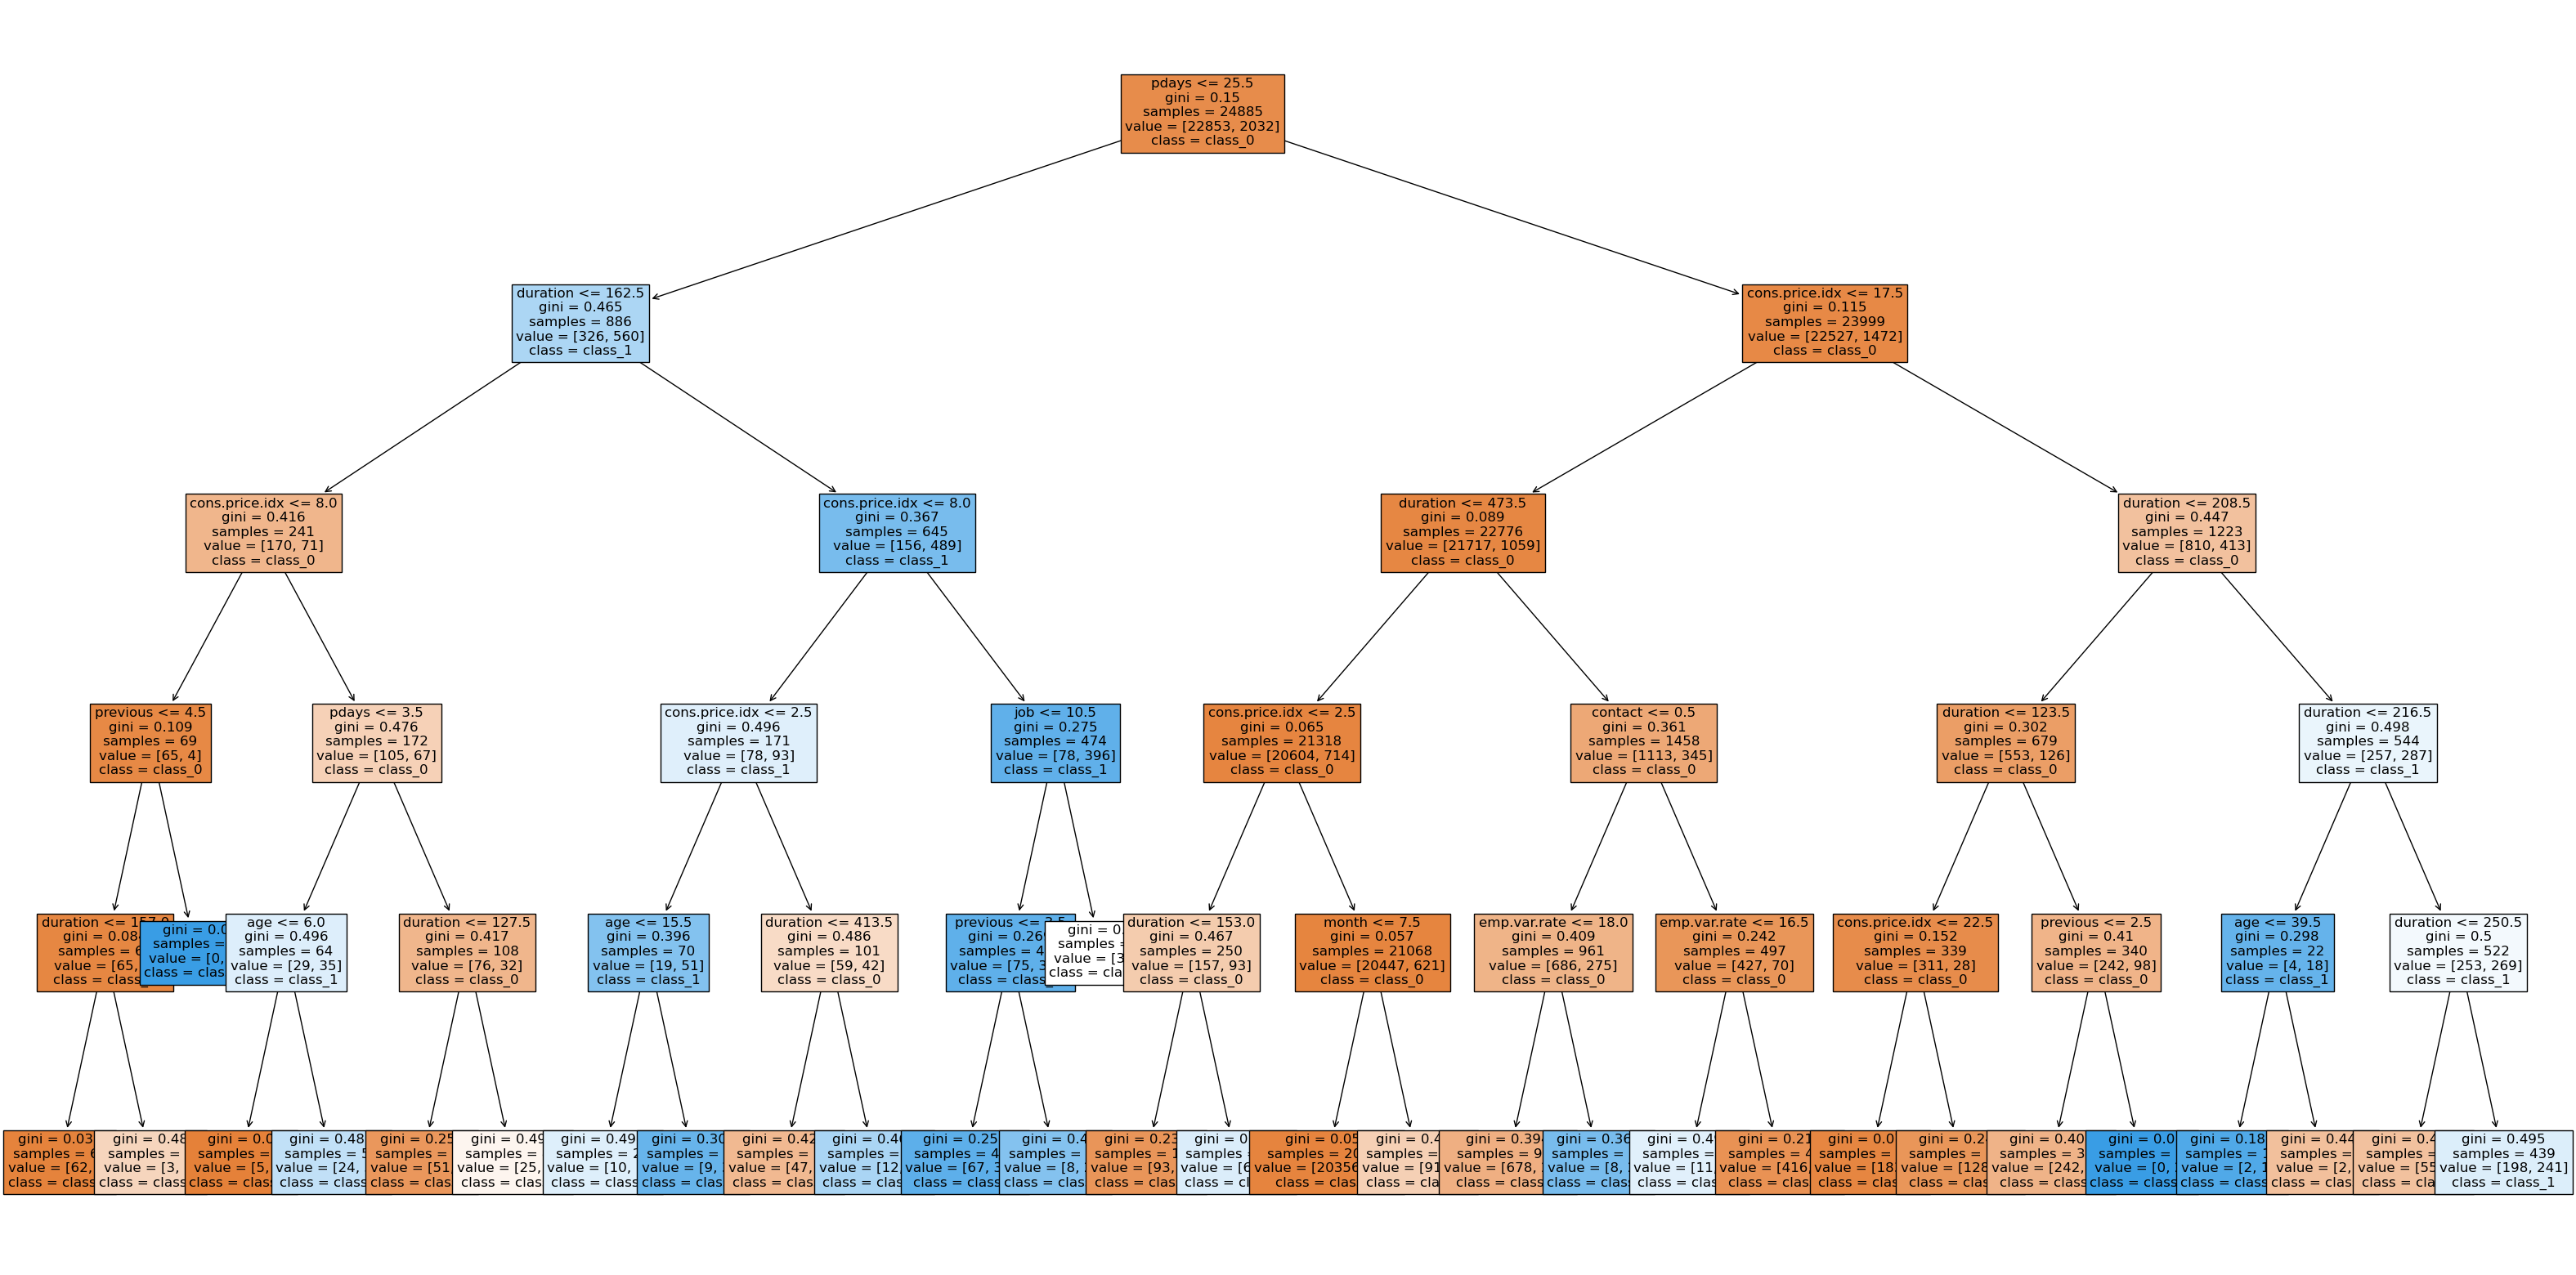

In [23]:
feature_names=data.columns.tolist()
plt.figure(figsize=(40,20))
class_names=["class_0","class_1"]
plot_tree(dt, feature_names=feature_names, class_names=class_names, filled=True,fontsize=12)
plt.show()